# Feature scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it

## Normalization

Normalization is the process of converting an actual range of values which a numerical feature can take, into a standard range of values, typically in the interval [−1,1] or [0,1]. 

For example, suppose the natural range of a particular feature is 350 to 1450. By subtracting 350 from every value of the feature, and dividing the result by 1100, one can normalize those values into the range [0,1]. 

More generally, the normalization formula looks like this: 

$$\overline{x}^{(j)}=\frac{x^{(j)}-m i n^{(j)}}{\max (j)-\min (j)}$$

Why do we normalize? Normalizing the data is not a strict requirement. However, in practice, it can lead to an increased speed of learning

Imagine you have a two-dimensional feature vector. When you update the parameters of $w (1)$  and $w (2)$ , you use partial derivatives of the mean squared error with respect to $w (1)$ and $w (2)$ . If $x (1)$ is in the range [0,1000] and $x (2)$ the range [0,0.0001], then the derivative with respect to a larger feature will dominate the update

## Standardization

Standardization (or z-score normalization) is the procedure during which the feature values are rescaled so that they have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$, where $\mu$ is the mean (the average value of the feature, averaged over all examples in the dataset) and $\sigma$ is the standard deviation from the mean.

Standard scores (or z-scores) of features are calculated as follows: 

$$\hat{x}^{(j)}=\frac{x^{(j)}-\mu^{(j)}}{\sigma^{(j)}}$$

### a rule of thumb

- unsupervised learning algorithms, in practice, more often benefit from standardization than from normalization;
- standardization is also preferred for a feature if the values this feature takes are distributed close to a normal distribution (so-called bell curve); 
- again, standardization is preferred for a feature if it can sometimes have extremely high or low values (outliers); this is because normalization will “squeeze” the normal values into a very small range; • in all other cases, normalization is preferable. 

## Visualize feature scaling

In [0]:
import pandas as pd

from sklearn.datasets import load_boston
import numpy as np
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
sns.distplot(df.CRIM)

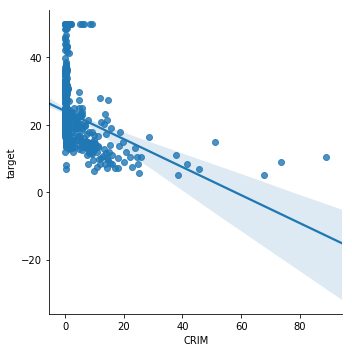

In [0]:
sns.lmplot(x="CRIM", y="target", data=df)

We standardize the data

In [0]:
def standardized(X):
  
  df_sdt = df.copy()
  name = X + '_std'
  df_sdt[name] = (df_sdt[X] - np.mean(df_sdt[X])) / np.std(df_sdt[X])
  
  df_sdt = df_sdt[[name, 'target']]
  
  sns.lmplot(x = name, y="target", data=df_sdt)

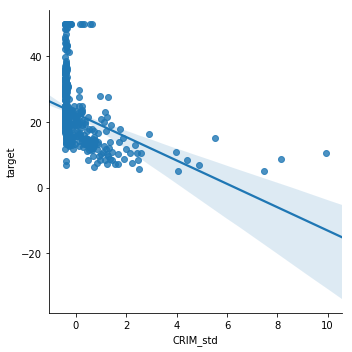

In [0]:
standardized(X = 'CRIM')

In [0]:
def min_max(X):
  
  df_minmax = df.copy()
  name = X + '_minmax'
 
  
  df_minmax[name] = (df_minmax[X] - np.min(df_minmax[X])) / \
  (np.max(df_minmax[X]) - np.min(df_minmax[X]))
  
  df_minmax = df_minmax[[name, 'target']]
  
  sns.lmplot(x = name, y="target", data=df_minmax)

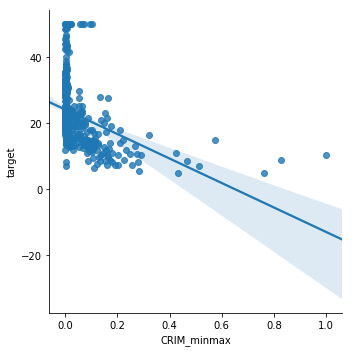

In [0]:
min_max(X = 'CRIM')

In [0]:
def log_scale(X):
  
  df_log = df.copy()
  name = X + '_log'
 
  
  df_log[name] = np.log(df_log[X])
  
  df_log = df_log[[name, 'target']]
  
  sns.lmplot(x = name, y="target", data=df_log)

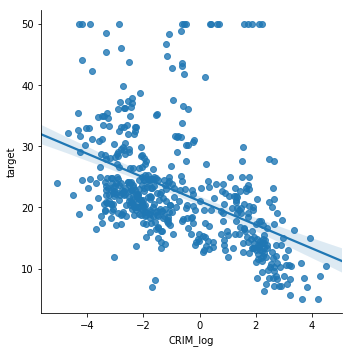

In [0]:
log_scale(X = 'CRIM')

## Train without feature scaling

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [0]:
X = df.drop(columns = ['target','RAD'])
Y = df['target']
print(len(X),len(Y))

506 506


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X,
                                   test_size=0.33,
                                   random_state=42)

print(len(X_train),len(X_test))

339 167


In [0]:
X_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,307.0,21.0,376.88,14.81


In [0]:
y_train, y_test = train_test_split(Y , test_size=0.33,random_state=42)
print(len(y_train),len(y_test))

339 167


In [0]:
def train_test(X_train, Y_train, X_test, Y_test):
  
  reg = KNeighborsRegressor().fit(X_train, Y_train)
  
  score_train = reg.score(X_train, Y_train)
  score_test = reg.score(X_test, y_test)
  print("Score train: %f    Score test: %f" % (score_train, score_test))

In [0]:
train_test(X_train, y_train, X_test, y_test)

Score train: 0.640664    Score test: 0.560693


## Feature scaling

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
pipe = Pipeline([
    ('sdt', StandardScaler()),
    ('linear', KNeighborsRegressor())])

reg = pipe.fit(X_train, y_train)
#reg.score(X_train, y_train)

score_train = reg.score(X_train, y_train)
score_test = reg.score(X_test, y_test)
print("Score train: %f    Score test: %f" % (score_train, score_test))

Score train: 0.844353    Score test: 0.742563


In [0]:
pipe = Pipeline([
    ('sdt', MinMaxScaler()),
    ('linear', KNeighborsRegressor())])

reg = pipe.fit(X_train, y_train)

score_train = reg.score(X_train, y_train)
score_test = reg.score(X_test, y_test)
print("Score train: %f    Score test: %f" % (score_train, score_test))

Score train: 0.840367    Score test: 0.718294


## Log


In [0]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,3.351324,11.716814,11.261858,0.076696,0.557498,6.327324,68.940118,3.762468,409.132743,18.261652,358.431475,12.497611
std,7.689661,22.981007,6.968227,0.266502,0.117683,0.720720,27.951508,2.144554,166.318304,2.245681,88.600864,7.181030
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082100,0.000000,5.130000,0.000000,0.448000,5.890000,45.650000,2.058100,280.500000,16.600000,376.355000,6.880000
50%,0.259150,0.000000,9.900000,0.000000,0.538000,6.229000,78.100000,3.102500,335.000000,18.600000,391.500000,10.970000
75%,3.397665,20.000000,18.100000,0.000000,0.631000,6.705500,93.900000,5.400700,666.000000,20.200000,396.220000,16.410000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [0]:
def log(ln_X):
  
  log_X = X[ln_X].copy()
  for x in ln_X:
    name = x + '_log'
    log_X[name] = np.log(log_X[x])
  
  log_X = log_X.iloc[:, -len(ln_X):]
  return log_X
  

In [0]:
ln_X = ['CRIM', 'INDUS', 'AGE','DIS', 'TAX', 'PTRATIO', 'LSTAT']
X_ = ["ZN", 'CHAS', 'NOX', 'B', 'RM']

X_log = log(ln_X = ln_X)
X_final = pd.concat([X_log, X[X_]], axis = 1)


X_train, X_test = train_test_split(X_final,
                                   test_size=0.33,
                                   random_state=42)
train_test(X_train, y_train, X_test, y_test)

Score train: 0.640891    Score test: 0.573577


In [0]:
def standardized(std_X):
  
  df_sdt = X[std_X].copy()
  for x in std_X:
    name = x + '_std'
    df_sdt[name] = (df_sdt[x] - np.mean(df_sdt[x])) / np.std(df_sdt[x])
    
  df_sdt = df_sdt.iloc[:, -len(std_X):]
  
  return df_sdt

In [0]:
ln_X = ['CRIM', 'INDUS', 'AGE','DIS', 'TAX', 'PTRATIO']
std_X = ["ZN", 'CHAS', 'NOX', 'RM', 'B', 'LSTAT']

X_log = log(ln_X = ln_X)
X_sdt = standardized(std_X)

X_final = pd.concat([X_log, X_sdt], axis = 1)
X_train, X_test = train_test_split(X_final,
                                   test_size=0.33,
                                   random_state=42)

train_test(X_train, y_train, X_test, y_test)

Score train: 0.851610    Score test: 0.751982
